#Setup

### Import Llibrary

In [1]:
import os 
import glob as gb
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Flatten,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Connect with Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset extraction

In [3]:
!unzip "/content/drive/MyDrive/DL_Project/03 Leaves.zip"  -d "/content/drive/MyDrive/DL_Project"

Archive:  /content/drive/MyDrive/DL_Project/03 Leaves.zip
replace /content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png  
  inflating: /content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/Ak/Ak (10).png  
  inflating: /content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/Ak/Ak (100).png  
  inflating: /content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/Ak/Ak (11).png  
  inflating: /content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/Ak/Ak (12).png  
  inflating: /content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/Ak/Ak (13).png  
  inflating: /content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/Ak/Ak (14).png  
  inflating: /content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/Ak/Ak (15).png  
  inflating: /content/drive/MyDrive/DL_Project/Grapevi

### Split the dataset into (Train - Test - Valid)

In [4]:
AYclasses=['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli']
os.chdir(r"/content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/")
if os.path.isdir('train') is False:
  os.mkdir('train')
  os.mkdir('valid')
  os.mkdir('test')
  for i in classes:
    print(i)
    shutil.move(f'{i}','train')
    os.mkdir(f'valid/{i}')
    os.mkdir(f'test/{i}')
    valid_samples=random.sample(os.listdir(f"train/{i}"),20)
    print(valid_samples)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}',f'valid/{i}')

    test_samples=random.sample(os.listdir(f"train/{i}"),5)
    for k in test_samples:
      shutil.move(f'train/{i}/{k}',f'test/{i}')
os.chdir('../..')

### Read some pictures and show it

In [5]:
s =224
X = []
y = []
trainpath = '/content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/test/'
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.png'))
    image = cv2.imread(files[0])
    image.shape
    image_array = cv2.resize(image , (s,s))
    X.append(list(image_array))
    y.append(folder)
        

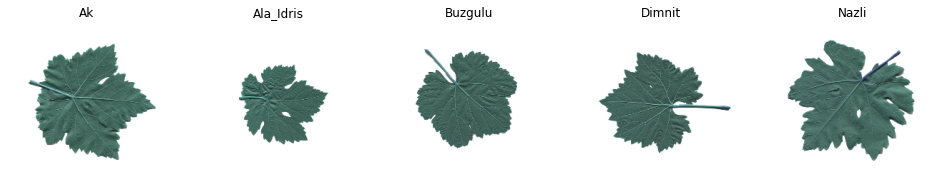

In [6]:
plt.figure(figsize=(20,20))
for  i in range(len(X)) : 
    plt.subplot(1,6,i+1)
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(y[i])

### Save_pathes

In [7]:
train_path="/content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/train"
test_path="/content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/test"
valid_path="/content/drive/MyDrive/DL_Project/Grapevine_Leaves_Image_Dataset/valid"

# CNN_Model

### CNN_Structure

In [ ]:
from tensorflow.keras import Sequential, layers
model = Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(2,2), kernel_initializer="he_uniform", input_shape=(300,300,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(2,2), kernel_initializer="he_uniform", activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(2,2), kernel_initializer="he_uniform", activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(2,2), kernel_initializer="he_uniform", activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, kernel_initializer="he_uniform", activation="relu"))
model.add(layers.Dense(units=512, kernel_initializer="he_uniform", activation="relu"))
model.add(layers.Dense(units=64, kernel_initializer="he_uniform", activation="relu"))
model.add(layers.Dense(units=5, kernel_initializer="glorot_uniform", activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 73, 73, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 64)       0

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
)

In [ ]:
history = model.fit(train_path, steps_per_epoch=4, epochs=30, validation_data=validation_generator, validation_steps=2)

Epoch 1/30
4/4 [==============================] - 84s 22s/step - loss: 5.6244 - accuracy: 0.1600 - val_loss: 5.4385 - val_accuracy: 0.2000
Epoch 2/30
4/4 [==============================] - 65s 17s/step - loss: 2.8115 - accuracy: 0.1973 - val_loss: 1.6491 - val_accuracy: 0.2000
Epoch 3/30
4/4 [==============================] - 64s 15s/step - loss: 1.6575 - accuracy: 0.2080 - val_loss: 1.6200 - val_accuracy: 0.1900
Epoch 4/30
4/4 [==============================] - 66s 15s/step - loss: 1.6203 - accuracy: 0.2053 - val_loss: 1.6079 - val_accuracy: 0.2000
Epoch 5/30
4/4 [==============================] - 63s 15s/step - loss: 1.6133 - accuracy: 0.2080 - val_loss: 1.6109 - val_accuracy: 0.2300
Epoch 6/30
4/4 [==============================] - 71s 16s/step - loss: 1.6084 - accuracy: 0.2347 - val_loss: 1.6050 - val_accuracy: 0.2100
Epoch 7/30
4/4 [==============================] - 65s 15s/step - loss: 1.6076 - accuracy: 0.2107 - val_loss: 1.6038 - val_accuracy: 0.2000
Epoch 8/30
4/4 [===========

#  ResNet50

### Data preprocessing

In [8]:
train_generator_resnet50 = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
        train_path,  
        target_size=(224, 224),  
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)
val_generator_resnet50 = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
        valid_path,  
        target_size=(224, 224),  
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)
test_generator_resnet50 =  ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
        test_path,  
        target_size=(224, 224),  
        batch_size=32,
        class_mode="categorical")

Found 375 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


### Training and Validation Generators


In [9]:
resnet = tf.keras.applications.ResNet50(input_shape=(224,224,3), include_top=False, weights='imagenet', classes=5)

x = GlobalAveragePooling2D()(resnet.output)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(units=5,activation = 'softmax')(x)
model_resnet = Model(resnet.input, output)

94781440/94765736 [==============================] - 0s 0us/step


In [10]:
#resnet_learning_rate = 0.001
opt = SGD(lr=0.001)
model_resnet.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
savebest = tf.keras.callbacks.ModelCheckpoint('resnet_beforefinetuning.h5', save_best_only=True);
history_resnet = model_resnet.fit(train_generator_resnet50, 
                                  validation_data=val_generator_resnet50, 
                                  epochs=40, 
                                 callbacks=[savebest])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/40
12/12 [==============================] - 101s 7s/step - loss: 1.7658 - accuracy: 0.2133 - val_loss: 1.8543 - val_accuracy: 0.1400
Epoch 2/40
12/12 [==============================] - 6s 457ms/step - loss: 1.6209 - accuracy: 0.2853 - val_loss: 1.7727 - val_accuracy: 0.2000
Epoch 3/40
12/12 [==============================] - 6s 471ms/step - loss: 1.5101 - accuracy: 0.3520 - val_loss: 1.7172 - val_accuracy: 0.2100
Epoch 4/40
12/12 [==============================] - 6s 459ms/step - loss: 1.3803 - accuracy: 0.4400 - val_loss: 1.6473 - val_accuracy: 0.2400
Epoch 5/40
12/12 [==============================] - 6s 496ms/step - loss: 1.3030 - accuracy: 0.4960 - val_loss: 1.5884 - val_accuracy: 0.2700
Epoch 6/40
12/12 [==============================] - 6s 526ms/step - loss: 1.2468 - accuracy: 0.5333 - val_loss: 1.5312 - val_accuracy: 0.3100
Epoch 7/40
12/12 [==============================] - 6s 462ms/step - loss: 1.1695 - accuracy: 0.5813 - val_loss: 1.4911 - val_accuracy: 0.3700
Epoch 8

In [11]:
model_resnet.evaluate(test_generator_resnet50)[1]

1/1 [==============================] - 1s 969ms/step - loss: 0.4411 - accuracy: 0.8800


0.8799999952316284

##### Note
- When Changing the epoch form ***35 to 40*** the accurcy increase from 85 to , the val_acc icrease from **84 to 91** and the test_acc ***frome 80 to 88***

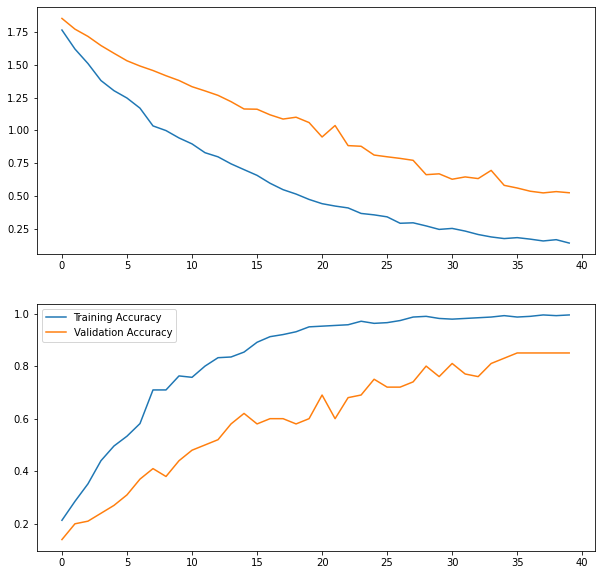

In [12]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

ax[0].plot(history_resnet.history['loss'],label='Training Loss')
ax[0].plot(history_resnet.history['val_loss'],label='Validation Loss')

ax[1].plot(history_resnet.history['accuracy'],label='Training Accuracy')
ax[1].plot(history_resnet.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

In [ ]:
#resnet_learning_rate = 0.001
opt = SGD(lr=0.0005)
model_resnet.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
savebest = tf.keras.callbacks.ModelCheckpoint('resnet_beforefinetuning.h5', save_best_only=True);
history_resnet = model_resnet.fit(train_generator_resnet50, 
                                  validation_data=val_generator_resnet50, 
                                  epochs=38, 
                                 callbacks=[savebest])

Epoch 1/38
12/12 [==============================] - 18s 1s/step - loss: 0.1292 - accuracy: 0.9760 - val_loss: 0.2665 - val_accuracy: 0.9100
Epoch 2/38
12/12 [==============================] - 13s 1s/step - loss: 0.1198 - accuracy: 0.9707 - val_loss: 0.2103 - val_accuracy: 0.9300
Epoch 3/38
12/12 [==============================] - 14s 1s/step - loss: 0.1309 - accuracy: 0.9680 - val_loss: 0.1836 - val_accuracy: 0.9300
Epoch 4/38
12/12 [==============================] - 12s 997ms/step - loss: 0.1296 - accuracy: 0.9653 - val_loss: 0.2322 - val_accuracy: 0.9100
Epoch 5/38
12/12 [==============================] - 11s 894ms/step - loss: 0.1408 - accuracy: 0.9680 - val_loss: 0.2350 - val_accuracy: 0.9100
Epoch 6/38
12/12 [==============================] - 11s 889ms/step - loss: 0.0950 - accuracy: 0.9760 - val_loss: 0.2489 - val_accuracy: 0.9200
Epoch 7/38
12/12 [==============================] - 11s 900ms/step - loss: 0.1000 - accuracy: 0.9840 - val_loss: 0.1982 - val_accuracy: 0.9000
Epoch 8/

In [ ]:
model_resnet.evaluate(test_generator_resnet50)[1]

1/1 [==============================] - 0s 311ms/step - loss: 0.3846 - accuracy: 0.8400


0.8399999737739563

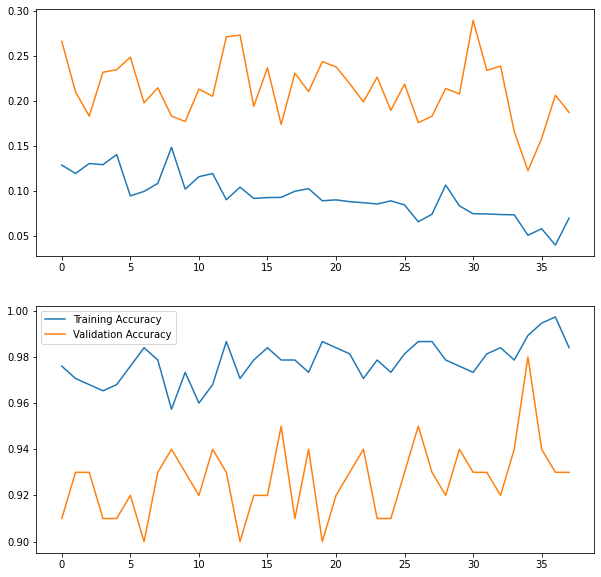

In [ ]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

ax[0].plot(history_resnet.history['loss'],label='Training Loss')
ax[0].plot(history_resnet.history['val_loss'],label='Validation Loss')

ax[1].plot(history_resnet.history['accuracy'],label='Training Accuracy')
ax[1].plot(history_resnet.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

# MobileNet

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path,target_size=(224,224),batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),batch_size=10,shuffle=False)

Found 375 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [ ]:
mobile=tf.keras.applications.mobilenet.MobileNet()
# mobile= tf.keras.applications.MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224,224,3) )
# mobile.summary()

In [ ]:
x=mobile.layers[-5].output
x

<KerasTensor: shape=(None, 1, 1, 1024) dtype=float32 (created by layer 'global_average_pooling2d_3')>

In [ ]:
output=Flatten()(x)
output=Dense(1024 ,activation="relu")(output)
output=Dropout(0.3)(output)
output=Dense(512 ,activation="relu")(output)
output=Dropout(0.3)(output)
output=Dense(256, activation="relu")(output)
output=Dropout(0.3)(output)
output=Dense(128, activation="relu")(output)
output=Dropout(0.4)(output)
output=Dense(64, activation="relu")(output)
output=Dropout(0.4)(output)
output=Dense(32, activation="relu")(output)
output=Dropout(0.3)(output)
output=Dense(5, activation="softmax")(output)


In [ ]:
model=Model(inputs=mobile.input,outputs=output)

In [ ]:
for layer in model.layers[:-23]:
    layer.trainable=False

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(x=train_batches,steps_per_epoch=len(train_batches),validation_data=valid_batches,validation_steps=len(valid_batches),epochs=20,verbose=2)

Epoch 1/20
38/38 - 8s - loss: 1.6140 - accuracy: 0.2107 - val_loss: 1.5541 - val_accuracy: 0.3700 - 8s/epoch - 209ms/step
Epoch 2/20
38/38 - 4s - loss: 1.5686 - accuracy: 0.2667 - val_loss: 1.5033 - val_accuracy: 0.6300 - 4s/epoch - 100ms/step
Epoch 3/20
38/38 - 4s - loss: 1.5398 - accuracy: 0.2507 - val_loss: 1.4428 - val_accuracy: 0.6700 - 4s/epoch - 99ms/step
Epoch 4/20
38/38 - 4s - loss: 1.4104 - accuracy: 0.4080 - val_loss: 1.3078 - val_accuracy: 0.7000 - 4s/epoch - 99ms/step
Epoch 5/20
38/38 - 4s - loss: 1.3176 - accuracy: 0.4080 - val_loss: 1.1841 - val_accuracy: 0.7300 - 4s/epoch - 99ms/step
Epoch 6/20
38/38 - 4s - loss: 1.2245 - accuracy: 0.4800 - val_loss: 1.0950 - val_accuracy: 0.7400 - 4s/epoch - 100ms/step
Epoch 7/20
38/38 - 4s - loss: 1.1093 - accuracy: 0.5307 - val_loss: 0.9535 - val_accuracy: 0.7500 - 4s/epoch - 98ms/step
Epoch 8/20
38/38 - 4s - loss: 1.0232 - accuracy: 0.5947 - val_loss: 0.8502 - val_accuracy: 0.7700 - 4s/epoch - 98ms/step
Epoch 9/20
38/38 - 4s - loss:

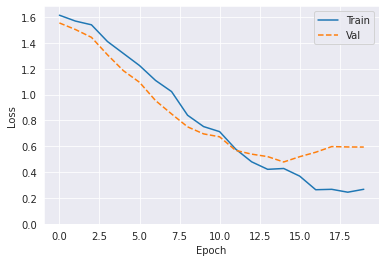

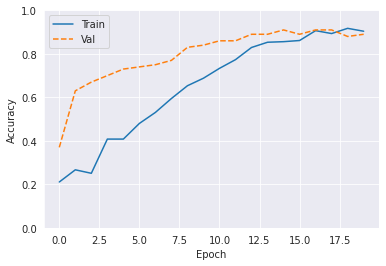

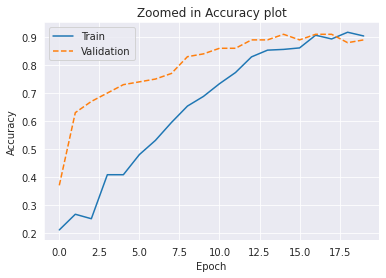

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    try:
      name = metric.replace("_"," ").capitalize()
      plt.plot(history.epoch, history.history[metric], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])
      plt.legend()
      plt.show()  
    except:
      pass
plot_metrics(model.history)

plt.title(label='Zoomed in Accuracy plot')
plt.plot(history.history["accuracy"],label='Train')
plt.plot(history.history["val_accuracy"],linestyle="--",label='Validation')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
test_labels=test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4], dtype=int32)

In [ ]:
predictions=model.predict(x=test_batches,steps=len(test_batches),verbose=0)

In [ ]:
cm=confusion_matrix(y_true=test_labels,y_pred=predictions.argmax(axis=1))
cm

array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 5]])

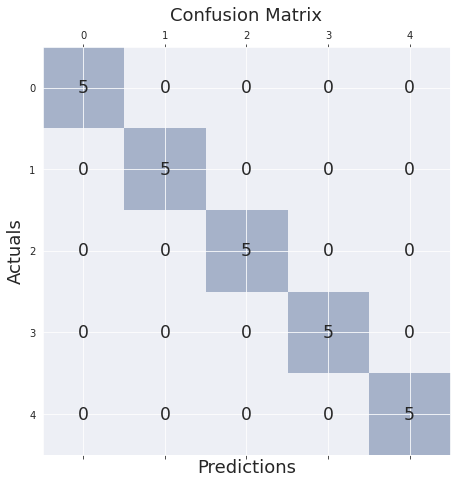

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Inception_Model

### Data Preprocss

In [ ]:
train_generator_inception_v3 = ImageDataGenerator(preprocessing_function=preprocess_input)..flow_from_directory(
        train_path,  
        target_size=(299, 299),  
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)
val_generator_inception_v3 =ImageDataGenerator(preprocessing_function=preprocess_input)..flow_from_directory(
        valid_path,  
        target_size=(299, 299),  
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)

test_generator_inception_v3 = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
        test_path,  
        target_size=(299, 299),  
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)

Found 375 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [ ]:
#Inception_Model
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output  = layers.Dense(units=5, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


#model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"])

In [ ]:
history_inception = model.fit_generator(train_generator_inception_v3, steps_per_epoch=4, epochs=38, validation_data=val_generator_inception_v3, validation_steps=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/38
4/4 [==============================] - 8s 2s/step - loss: 0.1591 - accuracy: 0.9219 - val_loss: 0.6519 - val_accuracy: 0.8438
Epoch 2/38
4/4 [==============================] - 8s 2s/step - loss: 0.1987 - accuracy: 0.9141 - val_loss: 1.0486 - val_accuracy: 0.6875
Epoch 3/38
4/4 [==============================] - 7s 2s/step - loss: 0.1625 - accuracy: 0.9496 - val_loss: 0.6800 - val_accuracy: 0.7656
Epoch 4/38
4/4 [==============================] - 7s 2s/step - loss: 0.1879 - accuracy: 0.9328 - val_loss: 1.2656 - val_accuracy: 0.7188
Epoch 5/38
4/4 [==============================] - 7s 2s/step - loss: 0.1598 - accuracy: 0.9531 - val_loss: 1.9098 - val_accuracy: 0.6562
Epoch 6/38
4/4 [==============================] - 7s 2s/step - loss: 0.2242 - accuracy: 0.9244 - val_loss: 1.4544 - val_accuracy: 0.6562
Epoch 7/38
4/4 [==============================] - 7s 2s/step - loss: 0.1652 - accuracy: 0.9496 - val_loss: 0.8465 - val_accuracy: 0.7812
Epoch 8/38
4/4 [=========================

Epoch 25/25
4/4 [==============================] - 7s 2s/step - loss: 0.1455 - accuracy: 0.9453 - val_loss: 0.8406 - val_accuracy: 0.7969
1/1 [==============================] - 1s 756ms/step - loss: 0.9366 - accuracy: 0.8000
0.800000011920929--------------------

Epoch 35/35
4/4 [==============================] - 7s 2s/step - loss: 0.1578 - accuracy: 0.9375 - val_loss: 0.5444 - val_accuracy: 0.8438


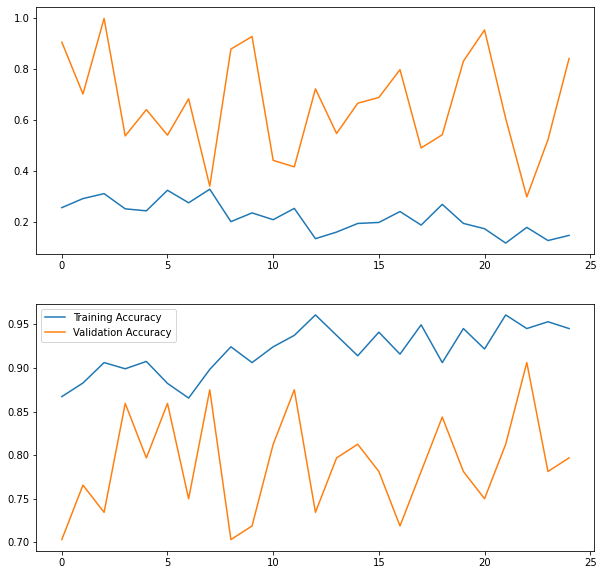

In [ ]:
f,ax=plt.subplots(2,1,figsize=(10,10)) 

ax[0].plot(history_inception.history['loss'],label='Training Loss')
ax[0].plot(history_inception.history['val_loss'],label='Validation Loss')

ax[1].plot(history_inception.history['accuracy'],label='Training Accuracy')
ax[1].plot(history_inception.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

In [ ]:
model.evaluate(test_generator_inception_v3)[1]

1/1 [==============================] - 1s 756ms/step - loss: 0.9366 - accuracy: 0.8000


0.800000011920929

# Resourses

1.  https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/


